**IDL Assignment - 1 (MLP)**

Team Members:

Sanjeeth Busnur Indushekar(224133)

Suraj Shashidhar(230052)

Aditya Dey(230580)


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [0]:
from datasets import MNISTDataset

11493376/11490434 [==============================] - 0s 0us/step
y = 9


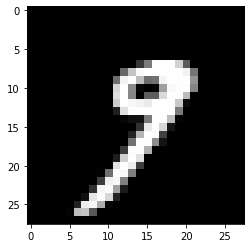

In [6]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
index = 33
plt.imshow(train_images[index], cmap="Greys_r")
print ("y = "+ str(np.squeeze(train_labels[index])))

In [7]:
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("test_images shape: " + str(test_images.shape))
print("test_labels shape: " + str(test_labels.shape))
print("total number of training samples: " + str(train_images.shape[0]))
print("total number of test samples: " + str(test_images.shape[0]))

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)
total number of training samples: 60000
total number of test samples: 10000


In [0]:
def initialize_parameters_deep(layer_dims):
  parameters = {}
  L = len(layer_dims)
  for i in range(1,L):
    parameters['W'+str(i)] = tf.Variable((np.random.rand(layer_dims[i-1],layer_dims[i]) * 0.01).astype(np.float32))
    parameters['b'+str(i)] = tf.Variable(np.zeros(layer_dims[i], dtype=np.float32))
    # parameters['b'+str(i)] = tf.Variable((np.random.rand(1, layer_dims[i]) * 0.01 ).astype(np.float32))
  return parameters

In [0]:
def linear_forward(A,W,b):
  Z = tf.matmul(A,W) + b
  return Z

In [0]:
def linear_activation_forward(A_prev,W,b,activation):
  if(activation == 'relu'):
    Z = linear_forward(A_prev,W,b)
    A = tf.nn.relu(Z)
  elif(activation == 'tanh'):
    Z = linear_forward(A_prev,W,b)
    A = tf.nn.tanh(Z)
  elif(activation == 'softmax'):
    Z = linear_forward(A_prev,W,b)
    A = tf.nn.softmax(Z)
  elif(activation == 'linear'):
    Z = linear_forward(A_prev,W,b)
    A = Z
  return Z,A


In [0]:
def forward_propogation(X,parameters,Y):
  caches = []
  A = X
  L = len(parameters)// 2
  with tf.GradientTape() as tape:
    if(L == 1):
      Z,AL = linear_activation_forward(X, parameters['W' + str(L)],parameters['b' + str(L)], activation = "linear")
    else:
      for i in range(1,L):
        A_prev = A 
        Z,A = linear_activation_forward(A_prev, parameters['W' + str(i)],parameters['b' + str(i)], activation = "tanh")
      Z,AL = linear_activation_forward(A, parameters['W' + str(L)],parameters['b' + str(L)], activation = "linear")
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=AL, labels=Y))
  return AL,tape,xent



In [0]:
def compute_cost(AL,Y):
  xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=AL, labels=Y))
  # print(xent)
  return xent

In [0]:
def backward_propogation(xent,parameters,tape,learning_rate):
  L = len(parameters)
  parameter_list = [x for x in parameters.values()]
  grads = tape.gradient(xent, parameter_list)
  for i in range(1,len(grads),2):
    ix = i//2 + 1
    parameters["W" + str(ix)].assign_sub(learning_rate * grads[i-1])
    parameters["b" + str(ix)].assign_sub(learning_rate * grads[i])
  return parameters

In [0]:
data = MNISTDataset(train_images.reshape([-1,784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,batch_size=128)

In [0]:
def L_layer_model(layers_dims, learning_rate = 0.1, num_iterations = 3000, print_cost=False):

    costs = [] 
    accuracy = []                        # keep track of cost
    
    parameters = initialize_parameters_deep(layers_dims)
    print(parameters.keys())

    for i in range(0, num_iterations):
      
      X, Y = data.next_batch()
      AL, tape, cost = forward_propogation(X, parameters,Y)
      parameters = backward_propogation(cost,parameters,tape,learning_rate)

      if print_cost and i % 100 == 0:
          print ("Cost after iteration %i: %f" %(i, cost))
          preds = tf.argmax(AL, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, Y),tf.float32))
          print("Accuracy: {}".format(acc))
          costs.append(cost)
          accuracy.append(acc)

    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    plt.plot(np.squeeze(accuracy))
    plt.ylabel('accuracy')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

**Output with 2 hidden layers and relu activation function**

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
Cost after iteration 0: 2.306568
Accuracy: 0.078125
Cost after iteration 100: 2.179146
Accuracy: 0.21875
Cost after iteration 200: 1.969569
Accuracy: 0.28125
Starting new epoch...
Cost after iteration 300: 1.851623
Accuracy: 0.3125
Cost after iteration 400: 1.580575
Accuracy: 0.3828125
Cost after iteration 500: 1.252743
Accuracy: 0.5703125
Cost after iteration 600: 1.147355
Accuracy: 0.6015625
Cost after iteration 700: 1.094321
Accuracy: 0.7421875
Starting new epoch...
Cost after iteration 800: 0.632906
Accuracy: 0.84375
Cost after iteration 900: 0.492699
Accuracy: 0.8515625
Cost after iteration 1000: 0.384018
Accuracy: 0.890625
Cost after iteration 1100: 0.329434
Accuracy: 0.9140625
Cost after iteration 1200: 0.364993
Accuracy: 0.9140625
Starting new epoch...
Cost after iteration 1300: 0.306250
Accuracy: 0.921875
Cost after iteration 1400: 0.397772
Accuracy: 0.875
Cost after iteration 1500: 0.270986
Accuracy: 0.9140625
Cost after iterati

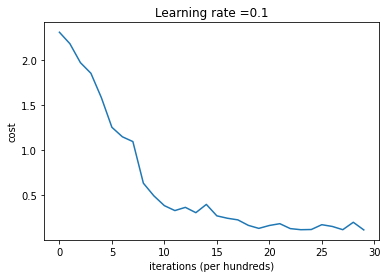

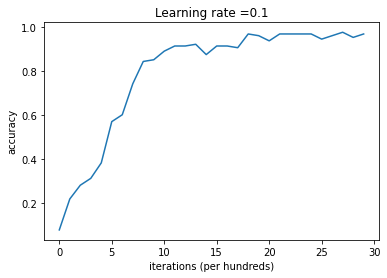

In [31]:
parameters = L_layer_model([784,512,128,10] , learning_rate = 0.1, num_iterations = 3000, print_cost=True)

In [32]:
AL,tape,cost = forward_propogation(data.test_data,parameters,data.test_labels)
preds = tf.argmax(AL, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(preds, data.test_labels),tf.float32))
print("Loss: {} Accuracy: {}".format(cost, acc))

Loss: 0.14866489171981812 Accuracy: 0.954800009727478


In [0]:
def print_mislabeled_images(test_images, features, actual_labels, predicted_labels):

    # Collect missclassified indiceswhich can be used to filter test data for only the data which has been mis classified later  
    misclassified_indices = np.asarray(np.where(actual_labels != predicted_labels))
    print("length: " + str(len(misclassified_indices)))
    
    fig = plt.figure()
    num_images = len(misclassified_indices[0])
    lst = misclassified_indices[0]
    print("Missclassified image count: " + str(num_images) + " , considering 6 images for analysis")

    for i in range(6):
        print("index: " + str(lst[i]))
        print("Actual label: " + str(actual_labels[lst[i]]))
        print("Predicted label: " + str(predicted_labels[lst[i]].numpy()))
        print("\n")
        fig.add_subplot(1, 8, i + 1)
        
        plt.imshow(X = test_images[lst[i]], cmap="Greys_r", aspect = "auto",interpolation="nearest")


length: 1
Missclassified image count: 452 , considering 6 images for analysis
index: 33
Actual label: 4
Predicted label: 6


index: 104
Actual label: 9
Predicted label: 5


index: 124
Actual label: 7
Predicted label: 4


index: 139
Actual label: 4
Predicted label: 8


index: 149
Actual label: 2
Predicted label: 8


index: 151
Actual label: 9
Predicted label: 8




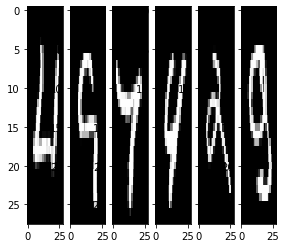

In [34]:
print_mislabeled_images(test_images, data.test_data, data.test_labels, preds)

**Output with 2 hidden layers and tanh activation function**

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
Cost after iteration 0: 2.301064
Accuracy: 0.140625
Starting new epoch...
Cost after iteration 100: 2.294906
Accuracy: 0.1328125
Cost after iteration 200: 2.103394
Accuracy: 0.28125
Cost after iteration 300: 1.621017
Accuracy: 0.3671875
Cost after iteration 400: 1.504495
Accuracy: 0.4375
Cost after iteration 500: 1.322419
Accuracy: 0.453125
Starting new epoch...
Cost after iteration 600: 1.746242
Accuracy: 0.3515625
Cost after iteration 700: 1.133901
Accuracy: 0.53125
Cost after iteration 800: 1.071658
Accuracy: 0.59375
Cost after iteration 900: 0.886207
Accuracy: 0.671875
Cost after iteration 1000: 0.658725
Accuracy: 0.78125
Starting new epoch...
Cost after iteration 1100: 0.723395
Accuracy: 0.765625
Cost after iteration 1200: 0.393648
Accuracy: 0.8671875
Cost after iteration 1300: 0.592577
Accuracy: 0.875
Cost after iteration 1400: 0.416031
Accuracy: 0.859375
Starting new epoch...
Cost after iteration 1500: 0.445245
Accuracy: 0.859375
C

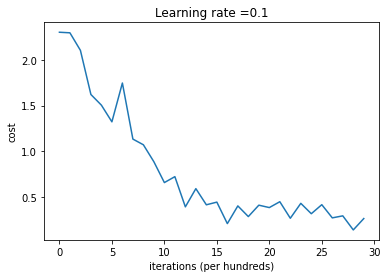

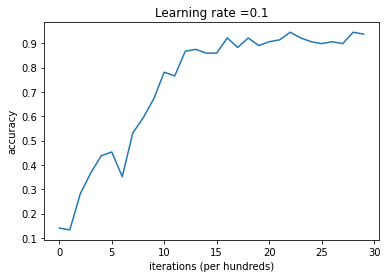

In [36]:
parameters = L_layer_model([784,512,128,10] , learning_rate = 0.1, num_iterations = 3000, print_cost=True)

In [37]:
AL,tape,cost = forward_propogation(data.test_data,parameters,data.test_labels)
preds = tf.argmax(AL, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(preds, data.test_labels),tf.float32))
print("Loss: {} Accuracy: {}".format(cost, acc))

Loss: 0.2175324410200119 Accuracy: 0.9347000122070312


## **Food For Thought**

**You need to initialize values randomly instead (e.g. random_uniform between -0.1 and 0.1). Why do you think this is the case?**

If we assign all the waits to zero, All the hidden units will behave symmetric even after n number of iterations which will be not useful.

i.e. the derivative of the loss function with prespect to weight will remain same for the nodes present in 'L'th layer.


**Which Activation function is better to use in hidden layers?**

As seen above Relu activation will perform better in hidden layers. tanh will take more iteration to reach lower gradient. Performance is better when we use Relu in hidden layers